In [161]:
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv("data.csv")
df.index = df.index + 1
df

,Year,X1,X2,X3
1,1980,2.81,7.54,7.89
2,1981,2.81,11.10,4.81
3,1982,2.56,3.80,4.64
4,1983,2.88,2.37,2.26
5,1984,2.70,3.49,1.90
6,1985,2.64,3.31,1.58
7,1986,2.31,4.85,3.30
8,1987,2.13,5.41,1.49
9,1988,2.29,5.32,14.79
10,1989,2.13,39.87,1.92


In [165]:
#df.drop(df.columns[[0]], axis=1, inplace=True)
df.describe()

,X1,X2,X3
count,31.000000,31.000000,31.000000
mean,3.318387,18.282581,5.511290
std,0.990384,10.017507,3.515219
min,2.070000,2.370000,1.490000
25%,2.565000,9.320000,3.080000
50%,2.880000,19.850000,4.660000
75%,4.485000,24.505000,6.915000
max,4.770000,39.870000,16.510000


In [188]:
for i in range(1, 28):
    print('Лаг - ', i, 'Значение - ', df['X1'].autocorr(lag=i))

Лаг -  1 Значение -  0.953361686336
Лаг -  2 Значение -  0.870480234462
Лаг -  3 Значение -  0.754870416439
Лаг -  4 Значение -  0.652681155699
Лаг -  5 Значение -  0.575740984059
Лаг -  6 Значение -  0.533121943365
Лаг -  7 Значение -  0.522902150197
Лаг -  8 Значение -  0.500231366771
Лаг -  9 Значение -  0.455832159575
Лаг -  10 Значение -  0.363589154661
Лаг -  11 Значение -  0.143585918663
Лаг -  12 Значение -  -0.179639373669
Лаг -  13 Значение -  -0.377486978327
Лаг -  14 Значение -  -0.403607057885
Лаг -  15 Значение -  -0.374803664205
Лаг -  16 Значение -  -0.308139955597
Лаг -  17 Значение -  -0.287811685952
Лаг -  18 Значение -  -0.281380436685
Лаг -  19 Значение -  -0.337774170526
Лаг -  20 Значение -  -0.118621655677
Лаг -  21 Значение -  0.150315452373
Лаг -  22 Значение -  -0.0638064726717
Лаг -  23 Значение -  -0.228027450912
Лаг -  24 Значение -  0.00813333280137
Лаг -  25 Значение -  0.446638181183
Лаг -  26 Значение -  -0.298559728483
Лаг -  27 Значение -  -0.6102388

In [194]:
X = [i for i in range(1, 32)]
Y = df['X1']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
print('\n ---- Predictions ----\n')
print(predictions)

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     58.48
Date:                Mon, 14 Jan 2019   Prob (F-statistic):           1.97e-08
Time:                        18:26:54   Log-Likelihood:                -26.066
No. Observations:                  31   AIC:                             56.13
Df Residuals:                      29   BIC:                             59.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8934      0.213      8.869      0.0

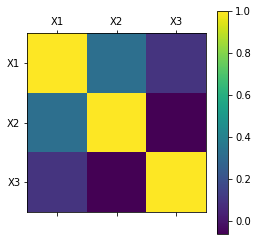

In [195]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [196]:
corr = df.corr()
corr.style.background_gradient()

,X1,X2,X3
X1,1,0.325453,0.0968826
X2,0.325453,1,-0.0636568
X3,0.0968826,-0.0636568,1


In [197]:
first = 1 + 0.325453 + 0.0968826
second = 0.325453 + 1 - 0.0636568
third = 0.0968826 - 0.0636568 + 1
print('Показатель 1 = ', first, 'Показатель 2 = ', second, 'Показатель 3 = ', third)

Показатель 1 =  1.4223356 Показатель 2 =  1.2617962 Показатель 3 =  1.0332258


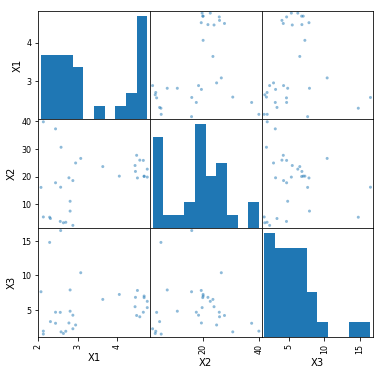

In [198]:
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()

In [199]:
X = df[['X2','X3']]
Y = df['X1']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
print('\n ---- Predictions ----\n')
print(predictions)

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.906
Date:                Mon, 14 Jan 2019   Prob (F-statistic):              0.168
Time:                        18:27:34   Log-Likelihood:                -41.201
No. Observations:                  31   AIC:                             88.40
Df Residuals:                      28   BIC:                             92.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5332      0.469      5.397      0.0